In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t,norm

In [10]:
def t_score_fun(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \ \neq 500 $$Null Hypothesis (Status Quo):$$ H_0: \ = 500 $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
Compute sample mean$$ \bar{x} \ = \ 465.3 $$
Step - 3: Compute Test Statistic, we don't have population's std so we will calculate t-score:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: two tailed t-test:$$ reject \ H_0 \ if \ \ |t| &gt; t_{n-1,\frac{\alpha}{2}} $$

Step - 5.2: Compute p-value

In [11]:
pop_mean = 500

l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_size = len(l)
sample_mean = sum(l)/len(l)

print(sample_mean)

465.3


In [12]:
# Calculating the std of sample

sample_std = []
for i in l:
    sample_std.append((i-sample_mean)**2)
    
sample_std = (sum(sample_std)/len(l))**0.5
print(sample_std)

82.3918078451978


In [15]:
# Right Tail - Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha/2, df) # One tailed t score for 95% Confidence Level

print(t_critical)

2.2621571627409915


In [16]:
# Calculating the t-score

t_score = t_score_fun(sample_size, sample_mean, pop_mean, sample_std)
print(t_score)

-1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

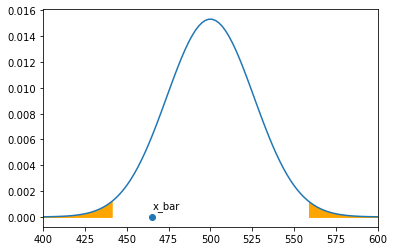

In [20]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [21]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [22]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09145971743176973
Fail to reject Null Hypothesis


Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ &gt; 4 $$Null Hypothesis (Status Quo):$$ H_0: \ &lt;= 4 $$

Step - 2:

Collect a sample of size n = 10$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
Compute sample mean$$ \bar{x} \ = \ 4.25 $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: right tailed t-test:$$ reject \ H_0 \ if \ \ t &gt; t_{n-1,\alpha} $$

Step - 5.2: Compute p-value

In [23]:
pop_mean = 4

l = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
sample_size = len(l)
sample_mean = sum(l)/len(l)

print(sample_mean)

4.25


In [24]:
# Calculating the std of sample

sample_std = []
for i in l:
    sample_std.append((i-sample_mean)**2)
    
sample_std = (sum(sample_std)/len(l))**0.5
print(sample_std)

0.82915619758885


In [25]:
# Right Tail - Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level

print(t_critical)

1.729132811521367


In [26]:
# Calculating the t-score

t_score = t_score_fun(sample_size, sample_mean, pop_mean, sample_std)
print(t_score)

1.3483997249264843


Text(4.25, 0.0007, 'x_bar')

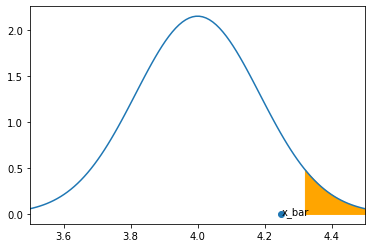

In [27]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [28]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [29]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08876492620607679
Fail to reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ &gt; 15 $$Null Hypothesis (Status Quo):$$ H_0: \ &lt;= 15 $$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
Compute sample mean$$ \bar{x} \ = \ 15.1 $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: right tailed t-test:$$ reject \ H_0 \ if \ \ t &gt; t_{n-1,\alpha} $$

Step - 5.2: Compute p-value

In [30]:
pop_mean = 15

l = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78,
     16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
sample_size = len(l)
sample_mean = sum(l)/len(l)

print(sample_mean)

15.098999999999998


In [31]:
# Calculating the std of sample

sample_std = []
for i in l:
    sample_std.append((i-sample_mean)**2)
    
sample_std = (sum(sample_std)/len(l))**0.5
print(sample_std)

0.9994043225842081


In [32]:
# Right Tail - Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level

print(t_critical)

1.729132811521367


In [33]:
# Calculating the t-score

t_score = t_score_fun(sample_size, sample_mean, pop_mean, sample_std)
print(t_score)

0.44300534782572615


Text(15.098999999999998, 0.0007, 'x_bar')

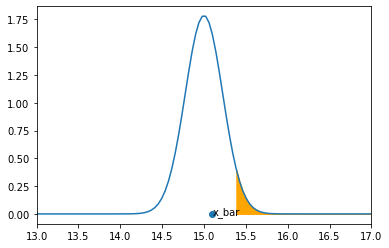

In [35]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [36]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [37]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32888093328445067
Fail to reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ H_1: \ &lt; 100 $$Null Hypothesis (Status Quo):$$ H_0: \ &gt;= 100 $$

Step - 2:

Collect a sample of size n = 20$$ [100.08, 102.13, 98.65, 94.78, 96.26, 100.97, 98.36, 100.81, 99.53, 97.79, 101.78,
   103.98, 94.23, 92.43, 91.46, 95.88, 98.31, 99.41, 105.76, 90.38] $$
Compute sample mean$$ \bar{x} \ = \ 98.149 $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $

Step - 5.1: left tailed t-test:$$ reject \ H_0 \ if \ \ t &lt; t_{n-1,\alpha} $$

Step - 5.2: Compute p-value

In [38]:
pop_mean = 100

l = [100.08, 102.13, 98.65, 94.78, 96.26, 100.97, 98.36, 100.81, 99.53, 97.79, 101.78,
     103.98, 94.23, 92.43, 91.46, 95.88, 98.31, 99.41, 105.76, 90.38]
sample_size = len(l)
sample_mean = sum(l)/len(l)

print(sample_mean)

98.149


In [39]:
# Calculating the std of sample

sample_std = []
for i in l:
    sample_std.append((i-sample_mean)**2)
    
sample_std = (sum(sample_std)/len(l))**0.5
print(sample_std)

3.980629221618111


In [40]:
# Right Tail - Calculating the t-critical value

confidence_level = 0.95
alpha = 1 - confidence_level
df = len(l)-1
t_critical = t.ppf(1 - alpha, df) # One tailed t score for 95% Confidence Level

print(t_critical)

1.729132811521367


In [41]:
# Calculating the t-score

t_score = t_score_fun(sample_size, sample_mean, pop_mean, sample_std)
print(t_score)

-2.079551546209891


Text(98.149, 0.0007, 'x_bar')

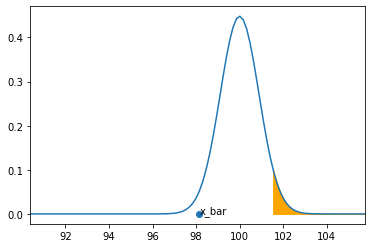

In [42]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 90.38
x_max = 105.76

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical values (One tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

# In this case sample mean falls in the acceptance region
# i.e. here we fail to reject the Null Hypothesis

In [43]:
# Conclusion using t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [44]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t_score))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.018783342602787356
Reject Null Hypothesis
